<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Shrinkage_Methods/Shrinking_Estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # R-style formula api

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
np.random.seed(1)

# The estimation problem

Given $N_{data}$ data points which are all independently drawn from a Gaussian with mean $\mu_{secret} \in \mathbb{R}^{N_{vars}}$, we would like to esimate the secret mean vector $\mu_{secret}$

We run $N_{samples}$ samples of this game, and store this all in a single array $X$ which has dimensions $(N_{samples},N_{data},N_{vars})$.

In [14]:
N_data = 4
N_samples = 10**4

mu_secret = np.array([3,0,-4,0,0,0,0,0,0,0])
N_vars = len(mu_secret)

In [15]:
def secret_data(N_samples,N_data):
  X = np.random.randn(N_samples,N_data,N_vars) + mu_secret
  return X

X = secret_data(N_samples,N_data)

# Unbiased estimation

Here we simply estimate using the empircal mean $\hat{\mu}_{Avg}$ whose $j$-th component is given by the average of the $j$-th component of the observations $X$:

$$\hat{\mu}_j = \frac{1}{N_{data}} \sum_{i=1}^{N_{data}} X_{i,j}$$

i.e. we just average in the usual way. This is repeated $N_{samples}$ times so we can draw a histogram of what happens.

In [16]:
mu_hats = np.mean(X,axis=1)
MSEs = np.mean((mu_hats - mu_secret)**2,axis=1)

print(f"Average MSE is {np.mean(MSEs):.3f}")

Average MSE is 0.249


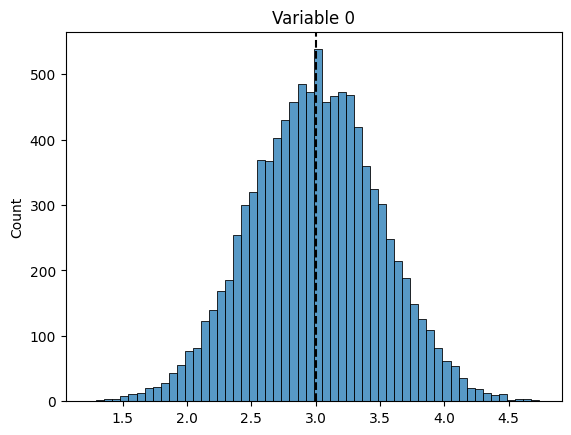

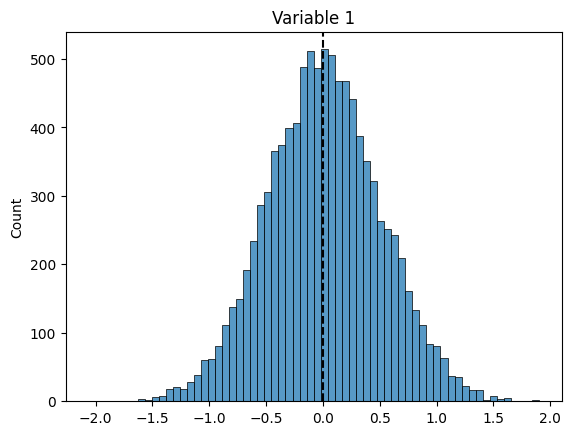

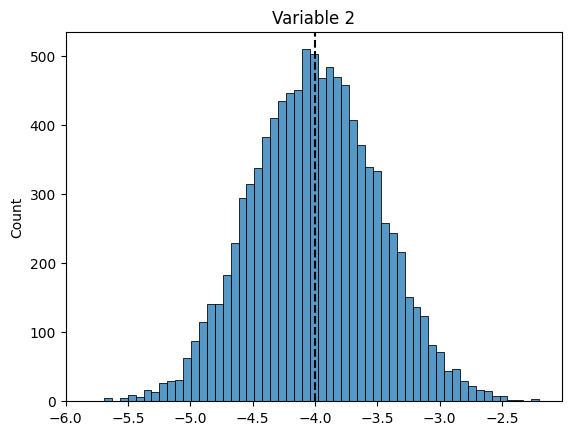

In [17]:
def plot_estimates(my_mu_hat,num_to_plot=N_vars):
  for i in range(num_to_plot): #change 3 to p to see all of them
    plt.title(f"Variable {i}")
    #plt.hist(mu_hats[:,i])
    sns.histplot(my_mu_hat[:,i])
    plt.axvline(x=mu_secret[i],color='k',ls='--')
    plt.show()

plot_estimates(mu_hats,num_to_plot=3)

# James-Stein Estimator

(See the excellent video about about this [James Stein Estimator: "The weirdest paradox in statistics" (21:43)](https://youtu.be/cUqoHQDinCM))

Here we compute a "shrinkage factor" of the form:

$$\lambda_{JS} = 1-\frac{N_{vars} - 2}{N_{data} || \hat{\mu} ||^2 } \in [0,1]$$

and then we use this to shrink our estimate to get a new estimate:

$$\hat{\mu}_{JS} = \lambda_{JS} \hat{\mu}$$

In [18]:
shrink_factor = 1 - (N_vars-2)/np.sum(mu_hats**2,axis=-1)/N_data
print(f"Avg Shrink Factor is: {np.mean(shrink_factor):.3f}")
mu_JS = mu_hats*shrink_factor[:,np.newaxis]
MSEs_JS = np.mean((mu_JS - mu_secret)**2,axis=-1)

print(f"Average MSE is {np.mean(MSEs_JS):.3f}")

Avg Shrink Factor is: 0.925
Average MSE is 0.234


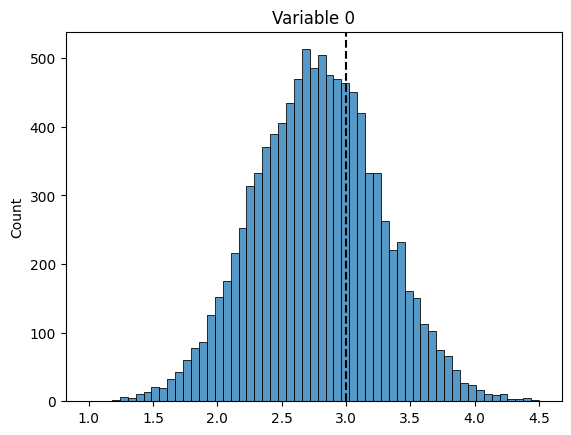

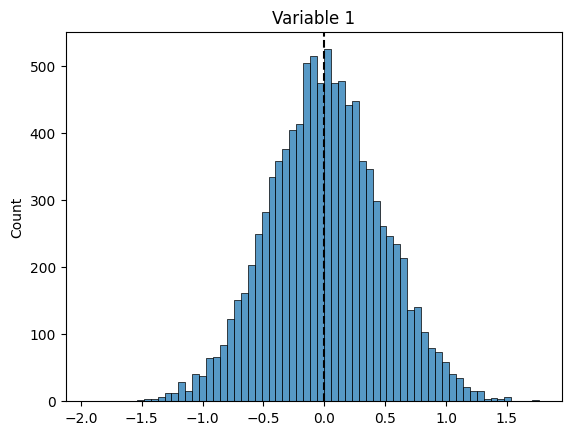

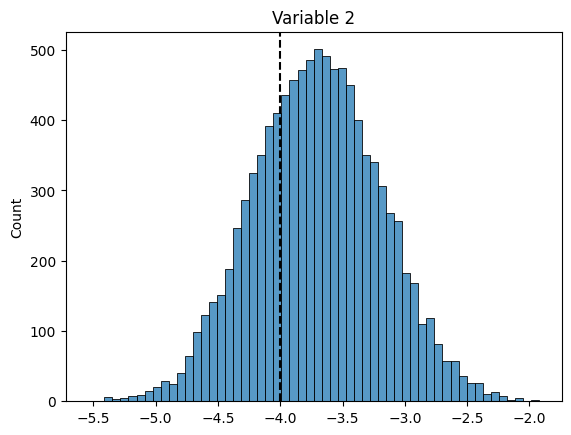

In [19]:
plot_estimates(mu_JS,num_to_plot=3)

# Fixed shrink factor

Of course, for any fixed $\lambda \in [0,1]$ we can simply shrink the mean by a factor of $\lambda$:

$$\hat{\mu}_\lambda = \lambda \hat{\mu}_{Avg}$$

In [20]:
def try_shrink_factors(shrink_factors):
  mu_shrink = mu_hats[np.newaxis,:,:]*shrink_factors[:,np.newaxis,np.newaxis]
  MSEs_shrink = np.mean((mu_shrink - mu_secret)**2,axis=-1)

  plt.xlabel("Shrink Factor")
  plt.ylabel("MSE")
  plt.title("MSE vs Shrinkage Factor")
  plt.plot(shrink_factors,np.mean(MSEs_shrink,axis=-1))


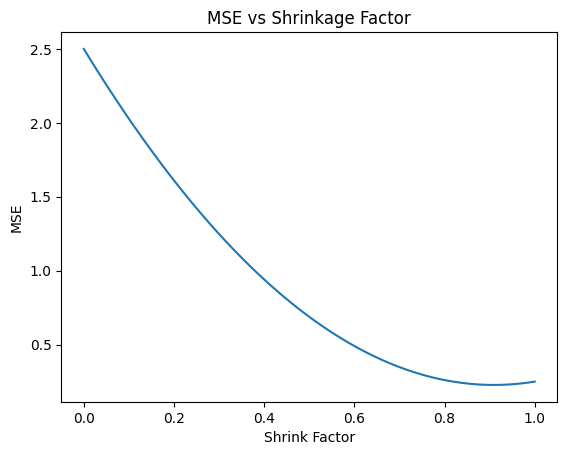

In [21]:
try_shrink_factors( np.linspace(0,1.0,100))

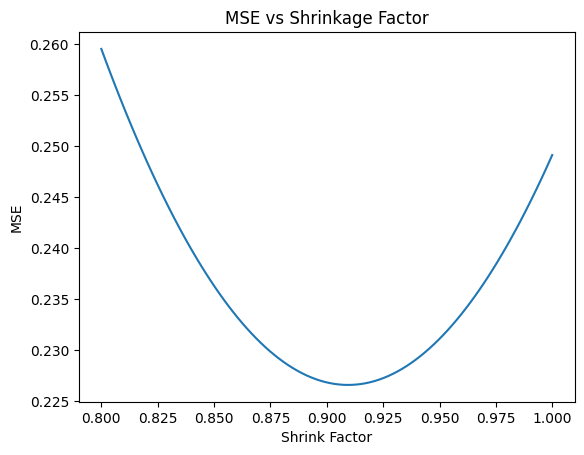

In [22]:
try_shrink_factors( np.linspace(0.8,1.0,100))

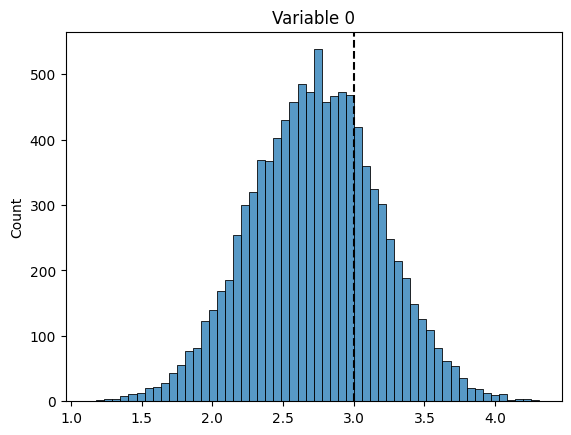

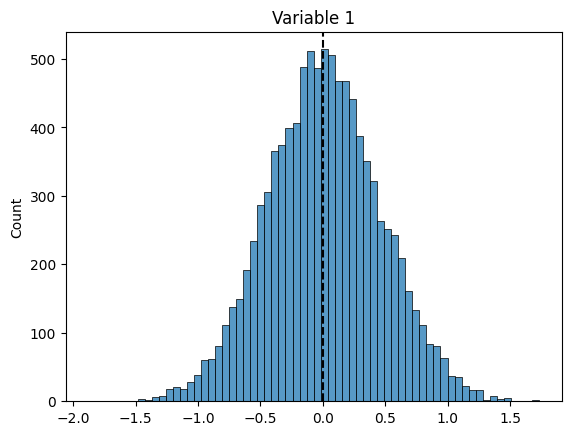

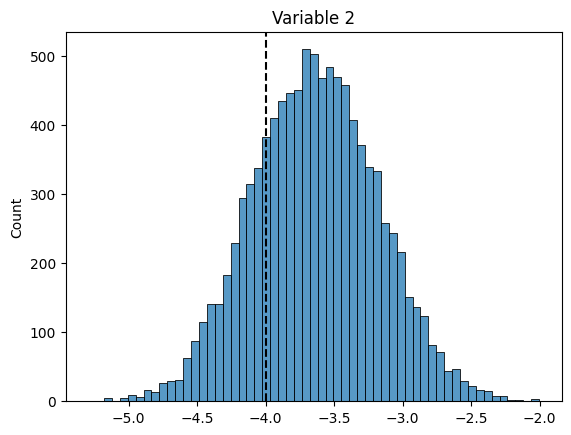

In [23]:
plot_estimates(0.91*mu_hats,num_to_plot=3)